# Linear Algebra
## Ch03 - Vector Multiplication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Dot product
It's one of the most important operations in Linear Algebra. The **dot product** is a single number that represents the relationship between two vectors. For this reason, is also sometimes called the "scalar-product".

Notation:
$$\large
\alpha =a\cdot b=\langle a,b\rangle =a^{T} b=\sum _{i=1}^{n} a_{i} b_{i}
$$


In [2]:
# dot product
v1 = np.array([2, 5, 4, 7])
v2 = np.array([4, 1, 0, 2])
np.dot(v1, v2)

27

In [3]:
v3 = v1*v2
v3

array([ 8,  5,  0, 14])

In [4]:
# Four ways to implement dot product
v1 = np.array([1, 2, 3, 4, 5])
v2 = np.array([0, -4, -3, 6, 5])

# Method 1
dp1 = sum(np.multiply(v1, v2))

# Method 2 (Recommended)
dp2 = np.dot(v1, v2)

# Method 3
dp3 = np.matmul(v1, v2)

# Method 4
dp4 = v1 @ v2

# Method 5
dp5 = 0
for i in range(len(v1)):
    dp5 += v1[i] * v2[i]
    
print(dp1, dp2, dp3, dp4, dp5)

32 32 32 32 32


### Distributive property of dot product

$$\large
w^{T}( u+v) \ =\ w^{T} u\ +\ w^{T} v
$$

The dot product is defined as the sum of element-wise multiplications. Common terms can be combined across sums, which brings us to the following:

$$\large
\sum _{i=1}^{n} w_{i}( u_{i} +v_{i}) \ =\ \sum _{i=1}^{n} w_{i} u_{i} \ +\ \sum _{i=1}^{n} w_{i} v_{i}
$$


In [5]:
# Three distinct vectors
u = np.array([1, 2])
v = np.array([1, 3])
w = np.array([2, 3])

# Distributive property of dot product
print(np.dot(w.T, (u+v)))
print(np.dot(w.T, u) + np.dot(w.T, v))

19
19


Example of applying the distributive property of the dot product between a vector and itself:

$$\large
( u+v)^{T}( u+v) \ =\ \| u+v\| ^{2} \ =\ u^{T} u\ +\ 2u^{T} v\ +\ v^{T} v\ =\ \| u\| ^{2} \ +\ \| v\| ^{2} \ +\ 2u^{T} v
$$

In [6]:
# Distributive property to the dot product between a vector and itself
np.dot((u+v).T, (u+v))

29

### Associative property of dot product
The dot product ___is not___ associative.

$$\large
 \begin{array}{l}
a( b\cdot c) \ =\ ( a\cdot b) c\\
\\
a^{T}\left( b^{T} c\right) \neq \left( a^{T} b\right)^{T} c\\
\\
\text{because:} \ \\
b^{T} c\ \neq a^{T} b
\end{array}
$$

In [7]:
# Associative property
a = np.array([1, 2])
b = np.array([1, 3])
c = np.array([2, 3])

# Compute associative property
dp1 = np.dot(a.T, np.dot(b.T, c))
dp2 = np.dot(np.dot(a.T, b).T, c)
print(dp1, dp2)

[11 22] [14 21]


## Is the dot product commutative?
$$\large
a^{T} b = b^{T} a
$$

However, matrix multiplication **is NOT commutative!**

1. Generate two 100-element random row vectors, compute dot product $a$ with $b$, $b$ with $a$
2. Generate two 2-element integer row vectors, repeat

In [8]:
# 1.Generate two 100-element random row vectors, compute dot product a with b, b with a
a = np.random.randn(100)
b = np.random.randn(100)

ab_dot = np.dot(a, b)
ba_dot = np.dot(b, a)

print(ab_dot == ba_dot)

True


In [9]:
# 2. Generate two 2-element integer row vectors, repeat
a = np.array([1, 2])
b = np.array([3, 4])

ab_dot = np.dot(a, b)
ba_dot = np.dot(b, a)

print(ab_dot == ba_dot, '\n')
print(np.dot(a, b), np.dot(b, a))

True 

11 11


## Vector length (a.k.a. magnitude or norm)
$$\large
\| v\| =\sqrt{v^{T} v}
$$

To compute the length of a vector, take the square root of the dot product of the vector with itself.

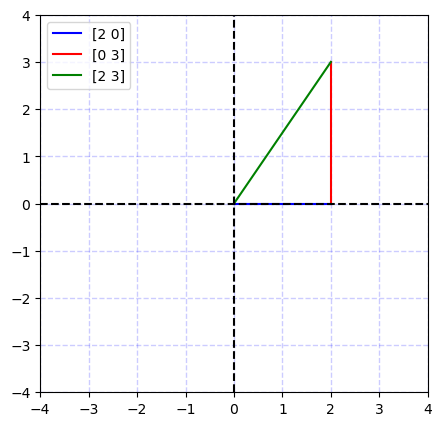

In [10]:
# Plot axis
def plot_axis(ax=3):
    plt.plot([-ax, ax],[0, 0],'k--')
    plt.plot([0, 0],[-ax, ax],'k--')
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.legend(loc='upper left')
    plt.axis([-ax,ax,-ax,ax]);

# Two vectors in R2
v1 = np.array([2, 0])
v2 = np.array([0, 3])
v3 = v1 + v2

# Plot vectors
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0, v1[0]],[0, v1[1]],'b',label=v1)
plt.plot([0, v2[0]]+v1[0],[0, v2[1]]+v1[1],'r',label=v2)
plt.plot([0, v3[0]],[0, v3[1]],'g',label=v3)

plot_axis(ax=4)
plt.show()

Example:

$$\large
 \begin{array}{l}
v=\begin{bmatrix}
2\\
3
\end{bmatrix}\\
\\
\| v\| ^{2} =( v_{1})^{2} +( v_{2})^{2}\\
\\
\| v\| ^{2} =4+9=13\\
\\
\| v\| =\sqrt{13}\\
\\
\| v\| =\sqrt{v^{T} v} =\sqrt{2\times 2+3\times 3} =\sqrt{13}
\end{array}
$$

In [11]:
# A vector
v1 = np.array([1, 2, 3, 4, 5, 6])

# Methods 1-4, just like with the regular dot product, e.g.:
vl1 = np.sqrt(sum(np.multiply(v1, v1)))

# Method 5: take the norm
vl2 = np.linalg.norm(v1)

print(np.round(vl1, 2), np.round(vl2, 2))

9.54 9.54


## The dot product from a geometric perspective
Algebra vs. Geometry: They're the same (really!)

$$\large
 \begin{array}{l}
\alpha =a^{T} b=\sum _{i=1}^{n} a_{i} b_{i} =\| a\| \ \| b\| \ cos( \theta _{ab})\\
\\
\text{Algebraic definition:} \ a^{T} b=\sum _{i=1}^{n} a_{i} b_{i}\\
\\
\text{Geometric definition:} \ \| a\| \ \| b\| \ cos( \theta _{ab})
\end{array}
$$

$\theta$ is the angle between two vectors. We can find the angle with the following formula:

$$\large
 \begin{array}{l}
\| a\| \ \| b\| \ cos( \theta _{ab})\\
\\
cos( \theta _{ab}) =\frac{a^{T} b}{\| a\| \ \| b\| }\\
\\
\theta _{ab} =cos^{-1}\left(\frac{a^{T} b}{\| a\| \ \| b\| }\right)
\end{array}
$$

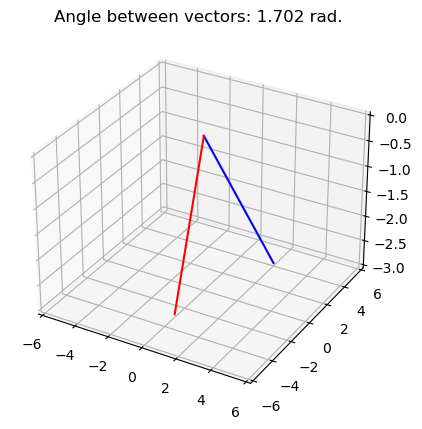

In [12]:
# Two vectors
v1 = np.array([2,  4, -3])
v2 = np.array([0, -3, -3])

# Compute the angle (radians) between two vectors
ang = np.arccos(np.dot(v1,v2) / np.abs(np.linalg.norm(v1) * np.linalg.norm(v2)))

# Plot vectors
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'b')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'r')

plt.axis((-6, 6, -6, 6))
plt.title(f"Angle between vectors: {round(ang, 3)} rad.")
plt.show()

### Equivalence of algebraic and geometric dot product formulas

In [13]:
# Two vectors
v1 = np.array([2,  4, -3])
v2 = np.array([0, -3, -3])

# Algebraic
dp_a = np.dot(v1, v2)

# Geometric
dp_g = np.linalg.norm(v1) * np.linalg.norm(v2) * np.cos(ang)

# Print dot product
print(np.round(dp_a))
print(np.round(dp_g))

-3
-3.0


#### Are the following vectors orthogonal?
a = [16 -2 4]

b = [.5 2 -1]

Take their dot product. **If the dot product is zero, then they are orthogonal!**

In [14]:
# Two vectors
a = np.array([16, -2, 4])
b = np.array([.5, 2, -1])

# Compute the angle (radians) between two vectors
dp = np.dot(a, b)
dp

0.0

### Linear weighted combination

It's a scalar-vector multiplication and addition.

$$\large
w = \lambda _{1} v_{1} + \lambda _{2} v_{2} + \lambda _{3} v_{3} + ... + \lambda _{n} v_{n}
$$

In [15]:
# Define scalars and vectors
l1 = 1
l2 = 2
l3 = -3
v1 = np.array([4, 5, 1])
v2 = np.array([-4, 0, -4])
v3 = np.array([1, 3, 2])

# Linear weighted combination
l1*v1 + l2*v2 + l3*v3

array([ -7,  -4, -13])

## Outer product
Combining two vectors to produce a matrix. The two vectors don't need to have the same size. The result is a $M\times N$ matrix.

**Dot product:**

$\large v^{T}w = 1\times 1$


**Outer product:**

$\large vw^{T} = M\times N$

This notation indicates that the dot product $(v^{T}w)$ is a $1\times 1$ array (just a single number; a scalar) whereas the outer product $(vw^{T})$ is a matrix whose sizes are defined by the number of elements in the vectors.

The outer product can be computed between two vectors with different dimensions.

### The outer product formula
$$\large
(vw^T)_{ij} = v_i w_j
$$

Example:

$$\large
\begin{bmatrix}
a\\
b\\
c
\end{bmatrix}\begin{bmatrix}
d & e & f
\end{bmatrix} =\begin{bmatrix}
ad & ae & af\\
bd & be & bf\\
cd & ce & cf
\end{bmatrix}
$$

In [16]:
# Define vectors
v = np.array([2, 5, 4, 7])
w = np.array([4, 1, 0, 2])

# Dot vs Outer product
dot = np.dot(v, w)
out = np.outer(v, w)

print(f"Dot product: {dot}\n")
print(f"Outer product: \n{out}")

Dot product: 27

Outer product: 
[[ 8  2  0  4]
 [20  5  0 10]
 [16  4  0  8]
 [28  7  0 14]]


In [17]:
# Vectors with different dimensions M*N
v = np.array([1, 2, 3, 4])
w = np.array([4, 1, -1])

# Outer product
np.outer(v, w)

array([[ 4,  1, -1],
       [ 8,  2, -2],
       [12,  3, -3],
       [16,  4, -4]])

In [18]:
a = np.array([3, 40])
b = np.array([10, 2, 30, 4])
c = np.outer(a, b)
c

array([[  30,    6,   90,   12],
       [ 400,   80, 1200,  160]])

In [19]:
# Using for loops to compute the outer product
a = np.array([1, 2, 3])
b = np.array([-1, 0, 1])

op_np = np.outer(a, b)

op = np.zeros((len(a), len(b)))
for i in range(len(a)):
    for j in range(len(b)):
        op[i][j] = a[i] * b[j]
        
print(f"NumPy outer product:\n{op_np}\
       \n\nFor loops outer product:\n{op}")

NumPy outer product:
[[-1  0  1]
 [-2  0  2]
 [-3  0  3]]       

For loops outer product:
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-3.  0.  3.]]


## Element-wise product
Multiplying each corresponding element in two vectors. Both vectors must have the same size. This operation results in another vector of the same size $M\times N$

$$\large
c=a\odot b=[ a_{1} b_{1} \ \ \ a_{2} b_{2} \ \ \ ...\ \ \ a_{n} b_{n}]
$$



In [20]:
# Two vectors with the same size
a = np.array([2, 5, 4, 7])
b = np.array([4, 1, 0, 2])

# Element-wise product
c = a * b
c

array([ 8,  5,  0, 14])

## Cross product
Defined only for 3-element vectors. Result is another 3-element vector.

$$\large
a\times b=\begin{bmatrix}
a_{2} b_{3}{} & a_{3} b_{2}\\
a_{3} b_{1} & a_{1} b_{3}\\
a_{1} b_{2} & a_{2} b_{1}
\end{bmatrix}
$$

In [21]:
# Two vectors with same size
a = np.array([5, 3, 4])
b = np.array([-2, 1, -1])

# Cross product
c = np.cross(a, b)
c

array([-7, -3, 11])

NumPy cross product: [15 20  1]        
Manual method: [[15], [20], [1]]



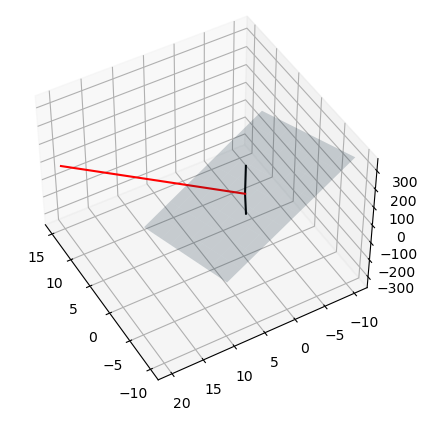

In [22]:
# Create vectors
v1  = np.array([ -3,  2, 5 ])
v2  = np.array([  4, -3, 0 ])

# NumPy cross-product function
v3a = np.cross( v1,v2 )

# "Manual" method
v3b = [ [v1[1]*v2[2] - v1[2]*v2[1]],
        [v1[2]*v2[0] - v1[0]*v2[2]],
        [v1[0]*v2[1] - v1[1]*v2[0]] ]

# Print results
print(f"NumPy cross product: {v3a}\
        \nManual method: {v3b}\n")

# Plot graph
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(projection='3d')

# Draw plane defined by span of v1 and v2
xx, yy = np.meshgrid(np.linspace(-10,10,10), np.linspace(-10,10,10))
z1 = (-v3a[0]*xx - v3a[1]*yy)/v3a[2]
ax.plot_surface(xx,yy,z1,alpha=.2)

# Plot the two vectors
ax.plot([0, v1[0]],[0, v1[1]], [0, v1[2]], 'k')
ax.plot([0, v2[0]],[0, v2[1]], [0, v2[2]], 'k')
ax.plot([0, v3a[0]],[0, v3a[1]], [0, v3a[2]], 'r')

ax.view_init(azim=150, elev=45)
plt.show()

## Unit vectors
Have magnitude (length) of one: $\| v\| =1$

Unit vectors allow the creation of orthogonal matrix.

$\large
\mu v\ \ \operatorname{s.t.} \ \ \| \mu v\| =1\ \ \ \operatorname{( s.t.\ means\ "such\ that"\ or\ "subject\ to")}
$

$\mu$ is a scalar used to compute a unit vector in the same direction as vector $v$.

### Creating a unit-lenght vector
Set $\mu$ to be the reciprocal (inverse) of the magnitude of the vector. In notation, a unit vector is given a hat to indicate it has a magnitude of one ($v\rightarrow \hat{v}$)

$$\large
\hat{v} =\frac{1}{\| v\| } v=\frac{1}{\sqrt{\sum _{i=1}^{n} v_{i}^{2}}} v
$$

The norm of the vector, $\| v\|$, is a scalar, which means:
1. Division is allowed (division by a full vector is not defined)
2. ___Direction of the vector does not change___

Example:

$$\large
v=\begin{bmatrix}
0\\
2
\end{bmatrix} ,\ \ \ \ \ \ \ \hat{v} =\frac{1}{\sqrt{0^{2} +2^{2}}}\begin{bmatrix}
0\\
2
\end{bmatrix} =\begin{bmatrix}
0\\
1
\end{bmatrix}
$$

Taking $\mu = \frac{1}{\| v\|}\| v\| = 1$ allows for a quick proof tha the unit vector really does have unit lenght:

$$\large
\| \mu v\| = \frac{1}{\| v\|}\| v\| = 1
$$

Original vector:  [3 6]
Unit vector:      [0.45 0.89]
Magnitude unit vector: 	1.0



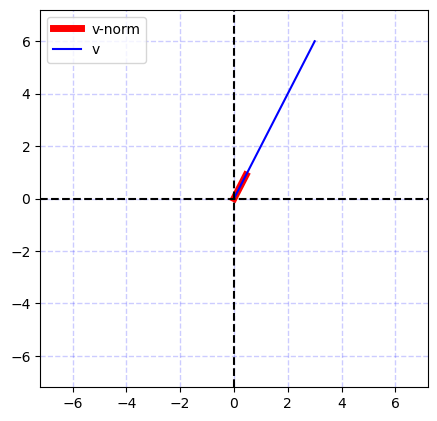

In [23]:
# Vector
v = np.array([3, 6])

# Magnitude
mu = 1/np.linalg.norm(v)

# Unit vector
v_unit = v*mu

# Print results
print(f"Original vector:  {v}")
print(f"Unit vector:      {np.round(v_unit, 2)}")
print(f"Magnitude unit vector: \t{np.round(np.dot(v_unit, v_unit),2)}\n")

# Plot vectors
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0, v_unit[0]], [0, v_unit[1]], 'r', label='v-norm', linewidth=5)
plt.plot([0, v[0]], [0, v[1]], 'b', label='v')

# Plot axis
axlim = max(abs(v))*1.2 # dynamic axis lim
plot_axis(ax=axlim)

In [24]:
# Unit vector computation
v = np.array([2, 5, 4, 7])
mu = 1/np.linalg.norm(v)
v_unit = v*mu
v_unit

array([0.20628425, 0.51571062, 0.4125685 , 0.72199487])

In [25]:
# Unit vector computation
v = np.array([3, 4])
mu = 1/np.linalg.norm(v)
v_unit = v*mu
v_unit

array([0.6, 0.8])

In [26]:
# Unit vector computation
v = np.array([1, 0])
mu = 1/np.linalg.norm(v)
v_unit = v*mu
v_unit

array([1., 0.])

In [27]:
import seaborn as sns

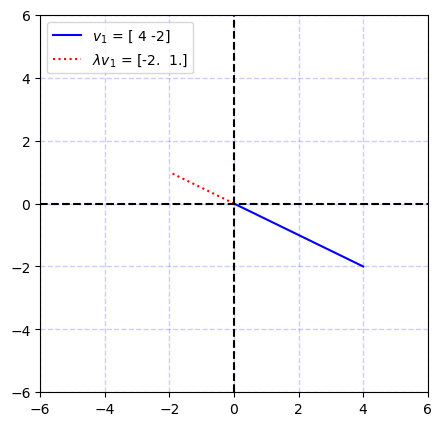

In [28]:
# vector and scalar
v1 = np.array([ 4, -2 ])
l  = -.5
v1m = v1*l # scalar-modulated

# plot them
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0, v1[0]],[0, v1[1]],'b',label=f'$v_1$ = {v1}')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label=f'$\lambda v_1$ = {v1m}')

axlim = max([max(abs(v1)),max(abs(v1m))])*1.5 # dynamic axis lim
plot_axis(ax=axlim)

## Code challenge
Create a 2 4x6 matrices of random numbers.

Use a for loop to compute dot products between corresponding columns.

In [29]:
A = np.round(np.random.randn(4, 6), 2)
B = np.round(np.random.randn(4, 6), 2)

print(f"A:\n{A}", '\n')
print(f"B:\n{B}", '\n')

def dot_product(A, B):
    dps = np.zeros(6)
    for i in range(6):
        dps[i] =  np.dot(A[:, i], B[:, i])

    return np.round(dps, 2)

# Dot product between columns
print(f"Dot product:\n{dot_product(A, B)}")

A:
[[ 0.12  0.33  1.21  1.25 -1.56  1.34]
 [ 0.6   3.83  0.92 -0.21 -0.76  0.56]
 [-0.16 -0.75  1.57 -0.15  0.1  -1.36]
 [-0.72  1.24  1.24 -0.81  0.37 -0.11]] 

B:
[[ 0.04  0.84 -0.12 -0.8   0.39  0.23]
 [ 0.35  0.78 -3.53 -0.19  0.53  0.38]
 [ 0.18 -1.9   0.31 -1.11 -2.49  0.68]
 [-0.97 -0.08  0.17  0.68  0.39 -0.34]] 

Dot product:
[ 0.88  4.59 -2.7  -1.34 -1.12 -0.37]


In [30]:
# Define matrices
m = 4
n = 6
A = np.round(np.random.randn(m, n), 2)
B = np.round(np.random.randn(n, m), 2)

# Function that computes matrix multiplication using for loops
def matrix_multiplication(A, B):
    matrix = np.zeros((4,4))
    for i in range(len(A)):
        for j in range(len(B[i])):
            matrix[i][j] = sum(A[i, :] * B[:, j])

    # matrix = np.array(matrix).reshape(m, m)
    return np.round(matrix, 2)

In [31]:
print(f"A:\n{A}", '\n')
print(f"B:\n{B}", '\n')

# Using for loops to perform matrix multiplication
matrix = matrix_multiplication(A, B)
print(f"Matrix multiplication using for loops:\n{matrix}\n")

A:
[[-0.23  0.33  0.99 -2.19 -0.41  1.52]
 [-0.05 -0.73  1.68 -0.18  1.06 -1.23]
 [ 1.94 -1.22  0.96 -1.53  1.62  2.4 ]
 [-0.8  -1.16 -1.32 -0.79 -1.42  1.01]] 

B:
[[-0.91 -0.43  1.12 -0.68]
 [ 2.55  0.91  0.25 -2.86]
 [ 0.85 -0.01 -2.18  0.38]
 [-0.25  0.9   1.29  1.52]
 [ 0.09 -1.02 -1.65  0.64]
 [ 0.18 -0.13 -0.19 -0.11]] 

Matrix multiplication using for loops:
[[ 2.68 -1.36 -4.77 -4.17]
 [-0.47 -1.74 -5.65  3.3 ]
 [-3.1  -5.3  -5.33  0.98]
 [-3.1  -0.09  2.82  1.14]]



In [32]:
# Using NumPy to perform matrix multiplication
print("Matrix multiplication using NumPy:")
print(np.round(np.matmul(A, B), 2))

Matrix multiplication using NumPy:
[[ 2.68 -1.36 -4.77 -4.17]
 [-0.47 -1.74 -5.65  3.3 ]
 [-3.1  -5.3  -5.33  0.98]
 [-3.1  -0.09  2.82  1.14]]


## Cauchy-Schwarz inequality: Code challenge
The Cauchy-Schwarz says the absolute value or the magnitude of the dot product between two vectors is less than or equal to the product of the norms of those two vectors.

$$\large
|a^{T} b|\leq \| a\| \ \| b\|
$$

Your goals:
1. Prove the C-S inequality.
2. Determine the condition for equality.
3. Demonstrate in code.

#### Solving the challenge
1. Cauchy-Schwarz mathematical proof:

$$\large
 \begin{array}{l}
|a^{T} b|\leq \| a\| \ \| b\| \\
\\
\| a\| \ \| b\| \ |cos( \theta _{ab}) |\leq \| a\| \ \| b\| \\
\\
\| a\| \ \| b\| \underbrace{|cos( \theta _{ab}) |}_{0\leq |cos( \theta _{ab}) |\leq 1} \leq \| a\| \ \| b\| \\
\\
cos( \theta _{ab}) \leq 1
\end{array}
$$

2. Determine the condition for equality:
    - Whenever the angle $\theta$ between vectors $a$ and $b$ is $0$ or $180$ degrees, the cosine will be $1$ or $-1$, and its absoulte value will be $1$. Thus, the magnitudes of both vectors will be equal. In other words, $\| a\| \ \| b\|= \| a\| \ \| b\|$
3. Code below.

In [33]:
# Create three vectors, one of which is dependent on another
a = np.round(np.random.randn(5), 2)
b = np.round(np.random.randn(5), 2)
c = np.round(np.random.randn(1) * a, 2)
print(f"Vector a: {a}\nVector b: {b}\nVector c: {c}\n")

# Left-hand side of equation. Compute the absolute value of their dot products
aTb = np.abs(np.dot(a, b))
aTc = np.abs(np.dot(a, c))

# Right-hand side of equation. Compute the magnitues of vectors a, b, c
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
norm_c = np.linalg.norm(c)

# Demonstrate the inequalities
print(f'Inequality:\
      \naTb <= ||a|| ||b|| \
      \n{np.round(aTb, 2)} <= {np.round(norm_a * norm_b, 2)}\n')

# Demonstrate the equalities
print(f'Equality:\
      \naTc = ||a|| ||c|| \
      \n{np.round(aTc, 2)} = {np.round(norm_a * norm_c, 2)}')

Vector a: [-1.55 -0.02  0.47 -1.07 -1.51]
Vector b: [ 0.92 -1.06 -0.54  1.44 -0.18]
Vector c: [-1.84 -0.02  0.56 -1.27 -1.8 ]

Inequality:      
aTb <= ||a|| ||b||       
2.93 <= 5.14

Equality:      
aTc = ||a|| ||c||       
7.19 = 7.19


## Code challenge: dot product sign and scalar multiplication
Test whether the dot product sign is invariant (affected) to scalar multiplication.

1. Generate two vectors (R3 - 3 dimensions)
2. Generate two scalars
3. Compute the dot product between vectors
4. Compute the dot product between the scaled vectors

#### Answer:
No. The sign of the dot product is not invariant to scalar multiplication. Scalar multiplication has an effect on the sign of the dot product.

In [34]:
# 1. Two vectors
v1 = np.array([-3, 4, 6])
v2 = np.array([3, 6, -3])

# 2. Two scalar
a = -2
b = -3

# 3. Dot product between vectors
dp1 = np.round(np.dot(v1, v2), 2)

# 4. Dot product between scaled vectors
dp2 = np.round(np.dot(v1*a, v2*b), 2)

print(f"Original: {dp1}\
       \nScaled: {dp2}")

Original: -3       
Scaled: -18


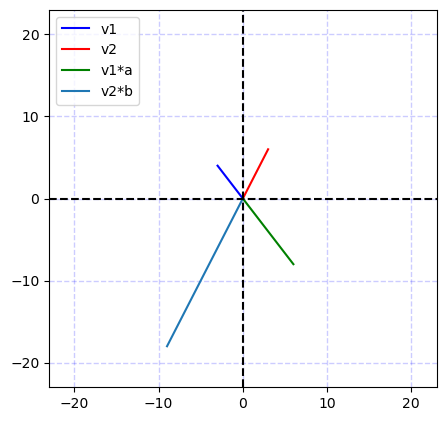

In [35]:
# Scaled vectors
v1a = v1 * a
v2b = v2 * b

# Plot vectors
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
plt.plot([0, v2[0]],[0, v2[1]],'r',label='v2')
plt.plot([0, v1a[0]],[0, v1a[1]],'g',label='v1*a')
plt.plot([0, v2b[0]],[0, v2b[1]],label='v2*b')

plot_axis(ax=np.max(np.abs([v1, v2, v1a, v2b]))+5)
plt.show()

## Hermitian transpose (a.k.a. conjugate transpose)

In [36]:
# Create a complex number
z = complex(3,4)
print(f"Complex number: {z}")

# Magnitude
print(f"Magnitude: {np.linalg.norm(z)}")

# By transpose?
print(f"Transpose: {np.transpose(z) * z}")

# By Hermitian transpose
print(f"Hermitian transpose: {np.transpose(z.conjugate()) * z}\n")

# Complex vector
v = np.array([3, 4j, 5+2j, complex(2,-5)])
print(f"Vector transpose: {v.T}")
print(f"Vector transpose: {np.transpose(v)}")
print(f"Hermitian transpose: {np.transpose(v.conjugate())}")

Complex number: (3+4j)
Magnitude: 5.0
Transpose: (-7+24j)
Hermitian transpose: (25+0j)

Vector transpose: [3.+0.j 0.+4.j 5.+2.j 2.-5.j]
Vector transpose: [3.+0.j 0.+4.j 5.+2.j 2.-5.j]
Hermitian transpose: [3.-0.j 0.-4.j 5.-2.j 2.+5.j]


## Code challenge: dot products with unit vectors
1. Create two random-integer vectors (R4)
2. Compute the lengths of the individual vectors, and magnitude of their dot product
3. "Normalize" the vectors: Create unit vectors with same direction as the original vectors
4. Compute the magnitude of the normalized vectors

In [37]:
# 1. Create two random-integer vectors
v1 = np.round(20*np.random.randn(4))
v2 = np.round(20*np.random.randn(4))

# 2. Compute length of vectors and magnitude of their dot product
v1m = np.round(np.sqrt(np.dot(v1, v1)), 2)
v2m = np.round(np.sqrt(np.dot(v2, v2)), 2)
dpm = np.abs(np.dot(v1, v2))
print(v1m, v2m, dpm)

# 3. "Normalize" vectors
v1_unit = np.round((1/np.linalg.norm(v1))*v1, 2)
v2_unit = np.round((1/np.linalg.norm(v2))*v2, 2)
print(v1_unit, v2_unit)

# 4. Magnitude of normalized vectors
dpm1 = np.abs(np.dot(v1_unit, v2_unit))
print(np.round(dpm, 2))
print()

## Solution
# 2. Compute length of vectors and magnitude of their dot product
v1m = np.round(np.sqrt(np.dot(v1, v1)), 2)
v2m = np.round(np.sqrt(np.dot(v2, v2)), 2)
dpm = np.round(np.abs(np.dot(v1, v2)), 2)
print(v1m, v2m, dpm)

# 3. "Normalize" vectors
v1u = np.round(v1/v1m, 2)
v2u = np.round(v2/v2m, 2)
print(v1u, v2u)

# 4. Magnitude of normalized vectors
dpm2 = np.abs(np.dot(v1u, v2u))
print(np.round(dpm, 2))

43.79 48.75 124.0
[ 0.39 -0.66  0.05  0.64] [ 0.62 -0.37  0.16 -0.68]
124.0

43.79 48.75 124.0
[ 0.39 -0.66  0.05  0.64] [ 0.62 -0.37  0.16 -0.68]
124.0


In [38]:
# Define vector
v = np.array([3, 4])

# Magnitude
vm = np.round(np.sqrt(np.dot(v, v)), 2)

# Normalize vector
vu = np.round(v/vm, 2)
vu2 = np.round(1/np.linalg.norm(vm)*vm, 2)

# Unit vector
vum = np.round(np.sqrt(np.dot(vu, vu)), 2)

# Results
print(v, vm)
print(vu, vu2)
print(vum)

[3 4] 5.0
[0.6 0.8] 1.0
1.0


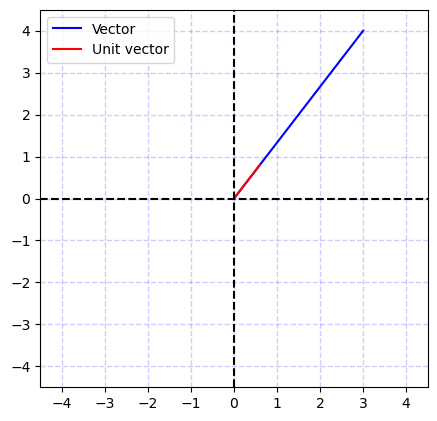

In [39]:
# Plot vectors
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0, v[0]],[0, v[1]],'b',label='Vector')
plt.plot([0, vu[0]],[0, vu[1]],'r',label='Unit vector')

axlim = np.max(np.abs([v, vu]))
plot_axis(ax=axlim+0.5)
plt.show()

## Dimension & Field
**Dimension:** the number of elements in a vector represents the vector's dimensionality. Each dimension corresponds to a new geometric direction.

**Field:** a set (typically numbers) on which addition, subtraction, multiplication, and division are valid operations. E.g., real numbers, complex numbers.

Notation:

$$\large
 \begin{array}{l}
\mathbb{R}^{2} \ \ \ \ \ \ \ \begin{bmatrix}
3 & -4
\end{bmatrix}\\
\mathbb{R}^{8} \ \ \ \ \ \ \ \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & \pi 
\end{bmatrix}\\
\mathbb{R}^{N} ,\ \mathbb{R}^{M}\\
v\in \mathbb{R}^{N}\\
w\in \mathbb{R}^{M}
\end{array}
$$

In [40]:
# Two dimension vector
r2 = np.array([3, -4])
print(f"R2: {r2}")

# Eight dimension vector
r8 = np.round(np.array([0, 0, 0, 0, 0, 0, 0, np.pi]), 2)
print(f"R8: {r8}")

R2: [ 3 -4]
R8: [0.   0.   0.   0.   0.   0.   0.   3.14]


## Subspace
A vector subspace must:
1. Be closed under addition and scalar multiplication.
2. Contain the zero vector.

Notation: 

$$\large
 \begin{array}{l}
\forall v,w\in V;\ \ \ \ \forall \lambda ,\alpha \mathbb{R} ;\ \ \ \ \lambda v+\alpha w\in V\\
\\
\lambda v,\ \lambda \in \mathbb{R}\\
\\
v=\begin{bmatrix}
2\\
3
\end{bmatrix} \ \ \ \ \ \ \ \ \ \ 2\begin{bmatrix}
2\\
3
\end{bmatrix} =\begin{bmatrix}
4\\
6
\end{bmatrix} \ \ \ \ \ \ \ \ \ \ -3\begin{bmatrix}
4\\
6
\end{bmatrix} =\begin{bmatrix}
-12\\
-18
\end{bmatrix}\\
\\
\lambda v+\beta w\\
\\
v=\begin{bmatrix}
2\\
3
\end{bmatrix} \ \ \ \ w=\begin{bmatrix}
0\\
4
\end{bmatrix} \ \ \ \ \ \ \ \ \ \ 6v-4w=\begin{bmatrix}
12\\
2
\end{bmatrix}
\end{array}
$$

## Subset vs Subspace
**Subset:** A set of points that satisfies some conditinos.
- Doesn't need to include the origin.
- Doesn't need to be closed.
- Can have boundaries.

Exampe of subset:
- All points on the XY plane such that x>0, y>0

How to find if it's a subset and/or subspace:
1. Determine whether the origin is in the set.
2. Try to write down the criteria in terms of scalars and vectors of the from $\alpha v+\beta w$

## Span
A span of a set of vectors is equal to all possible linear combinations of all the vectors in that set.

$$\large
\text{span}(\{v_{1} ,\ ...,\ v_{n}\}) =\alpha _{1} v_{1} +...+\alpha _{n} v_{n} ,\ \alpha \in \mathbb{R}
$$

In [41]:
# Two vectors
v = np.array([1, 2, 0])
w = np.array([3, 2, 1])

# Set of two vectors
s = np.array([[1, 1, 0], [1, 7, 0]])

# v is in span(S) because:
5/6*s[0] + 1/6*s[1]

array([1., 2., 0.])

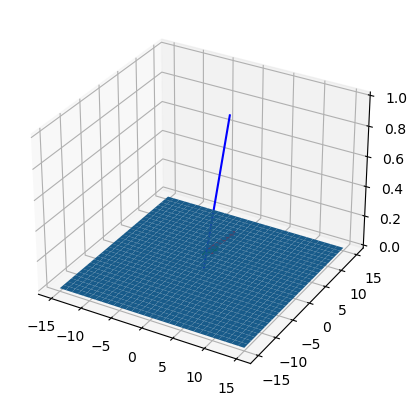

In [42]:
# set S
S1 = np.array([1, 1, 0])
S2 = np.array([1, 7, 0])

# vectors v and w
v = np.array([1, 2, 0])
w = np.array([3, 2, 1])

# Daw vectors
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(projection='3d')

ax.plot([0, S1[0]],[0, S1[1]],[.1, S1[2]+.1],'r',linewidth=3)
ax.plot([0, S2[0]],[0, S2[1]],[.1, S2[2]+.1],'r',linewidth=3)
ax.plot([0, v[0]],[0, v[1]],[.1, v[2]+.1],'g',linewidth=3)
ax.plot([0, w[0]],[0, w[1]],[0, w[2]],'b')

# Now draw plane
xx, yy = np.meshgrid(range(-15,16), range(-15,16))
cp = np.cross(S1,S2)
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)
plt.show()

In [43]:
# Quiz
# Vector
v = np.array([1, 2, 3])

# Set of vectors
s1 = np.array([2, 6, -3])
s2 = np.array([0, -2, 9])

# Determine whether a vector is in the span of a set of vectors
1/2*s1 + 1/2*s2

array([1., 2., 3.])

## Linear dependence
Formal definition: Determining if a weighted combination of the vectors in the set can form the zero vector, where at least one scalar is not equal to zero.

$$\large
 \begin{array}{l}
0=\lambda _{1} v_{1} +\lambda _{2} v_{2} +...+\lambda _{n} v_{n} \ \ \ \ \ \ \ \ \ \ \lambda \in \mathbb{R}\\
\\
\lambda _{1} v_{1} =\lambda _{2} v_{2} +...+\lambda _{n} v_{n}\\
\\
v_{1} =\frac{\lambda _{2}}{\lambda _{1}} v_{2} +...+\frac{\lambda _{n}}{\lambda _{1}} v_{n} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \lambda _{1} \neq 0,\ v_{1} \neq 0
\end{array}
$$

A set of M vectors is **independent** only if each vector points in a geometric dimension not reachable using other vectors in the set.

- Any set of $M>N$ vectors in $R^N$ is **dependent**.
- Any set of $M\leq N$ vectors in $R^N$ is **independent**.

How to determine whether a set is independent:
1. Count vectors and compare with $R^N$.
2. Check for 0's in corresponding (or all) elements.
3. Educated guess and test.
4. Matrix rank method.

## Basis sets

Example: standard basis vectors

$$\large
 \begin{array}{l}
\mathbb{R}^{2} =\left\{\begin{bmatrix}
1\\
0
\end{bmatrix}\begin{bmatrix}
0\\
1
\end{bmatrix}\right\}\\
\\
\mathbb{R}^{3} =\left\{\begin{bmatrix}
1\\
0\\
0
\end{bmatrix}\begin{bmatrix}
0\\
1\\
0
\end{bmatrix}\begin{bmatrix}
0\\
0\\
1
\end{bmatrix}\right\}
\end{array}
$$

Basis sets must be **linear independent**.